<h1>Family Income and Expenditure Data Analytics</h1>
<hr>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
family = pd.read_csv('Family Income and Expenditure.csv')

In [3]:
family['Household Head Occupation'] = family['Household Head Occupation'].fillna('uknown')
family['Household Head Class of Worker'] = family['Household Head Class of Worker'].fillna('uknown')
family['Toilet Facilities'] = family['Toilet Facilities'].fillna('uknown')

In [4]:
#filter data
IVA = family[family['Region'] == 'IVA - CALABARZON']

<h2>1. What is the average household income by “Type of Household”?</h2>

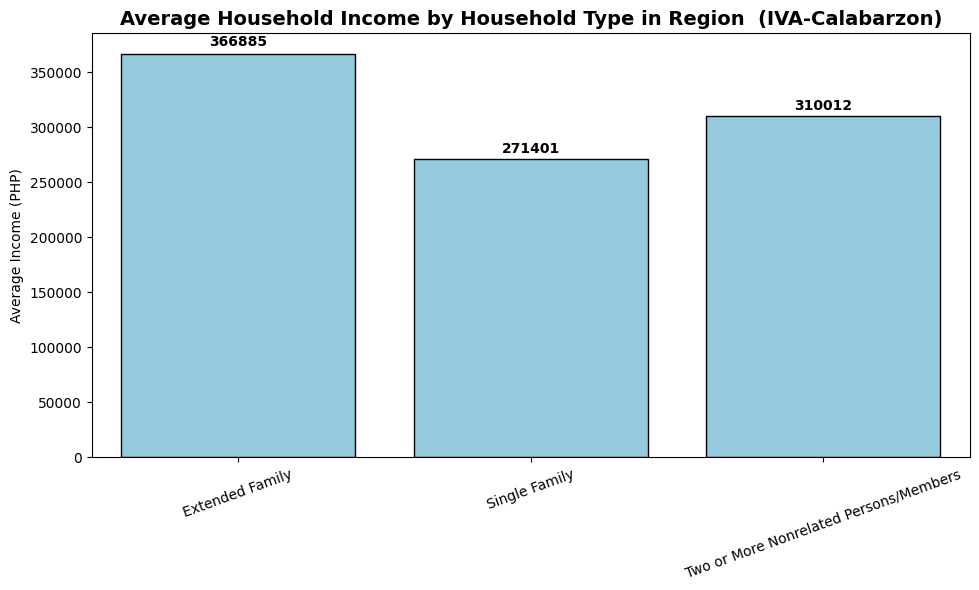

In [5]:
#descriptive analytics 1
avg_income = IVA.groupby("Type of Household")["Total Household Income"].mean()

avg_df = avg_income.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_df, 
    x="Type of Household", 
    y="Total Household Income",
    color="skyblue",
    edgecolor="black"
)

# Add value labels above bars
for i, row in avg_df.iterrows():
    ax.text(
        i, 
        row["Total Household Income"] + (row["Total Household Income"] * 0.01),  # slight offset
        f"{row['Total Household Income']:.0f}", 
        ha="center", 
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.xticks(rotation=20)
plt.title("Average Household Income by Household Type in Region  (IVA-Calabarzon)", fontsize=14, fontweight="bold")
plt.ylabel("Average Income (PHP)")
plt.xlabel("")

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The visualization shows that household income in Region IVA (CALABARZON) varies significantly by household type. Extended families have the highest average income, likely because they include multiple adult earners contributing to the household budget. Households with two or more unrelated persons also show relatively high income, suggesting a similar pattern of shared earning power.</p>

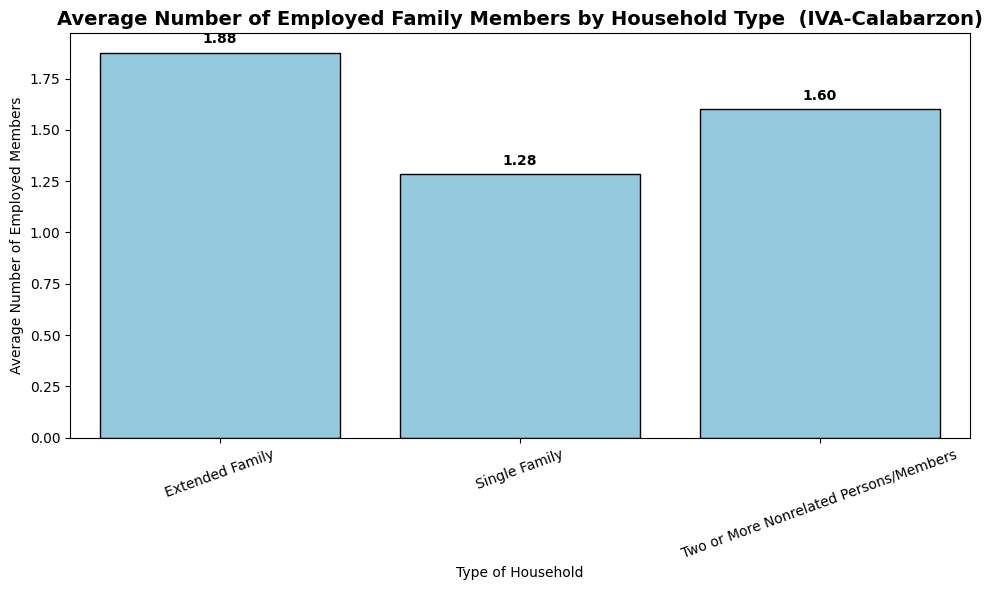

In [6]:
#diagnostic analytics to support 1
employed = IVA.groupby("Type of Household")["Total number of family members employed"].mean()
employed_rounded = employed.reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=employed_rounded,
    x="Type of Household",
    y="Total number of family members employed",
    color="skyblue",
    edgecolor="black"
)

# Add value labels above bars
for i, row in employed_rounded.iterrows():
    value = row["Total number of family members employed"]
    ax.text(
        i,
        value + 0.03,  # small upward offset so text doesn't touch the bar
        f"{value:.2f}",    # show 2 decimals since mean may not be whole number
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.xticks(rotation=20)
plt.ylabel("Average Number of Employed Members")
plt.xlabel("Type of Household")
plt.title("Average Number of Employed Family Members by Household Type  (IVA-Calabarzon)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>This visualization reveals why extended families have the highest household income in Region IVA (Calabarzon). Extended households show the highest average number of employed members (1.88), followed by households with two or more unrelated persons (1.60). Single-family households have the fewest employed members (1.28).</p>

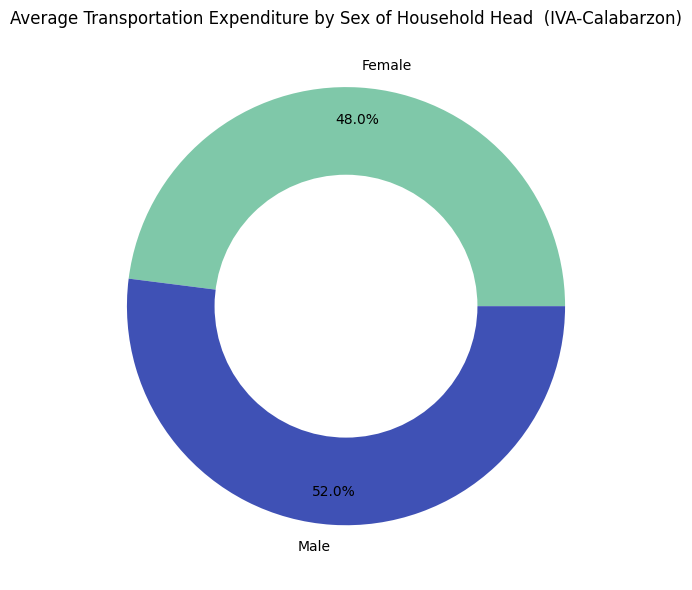

In [7]:
#descriptive analytics 2
IVA = family[family['Region'] == 'IVA - CALABARZON']

transpo = IVA.groupby("Household Head Sex")["Transportation Expenditure"].mean()

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    transpo.values, 
    labels=transpo.index,
    autopct='%1.1f%%',  
    pctdistance=0.85,
    colors = ('#7FC8A9', '#3F51B5'),
)

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average Transportation Expenditure by Sex of Household Head  (IVA-Calabarzon)")
plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The pie chart reveals a clear difference in average transportation expenditure between male-headed and female-headed households in Region IVA (Calabarzon). Male household heads account for a larger share of transportation spending, indicating that households led by men tend to allocate more of their budget to transportation.</p>

<Figure size 800x600 with 0 Axes>

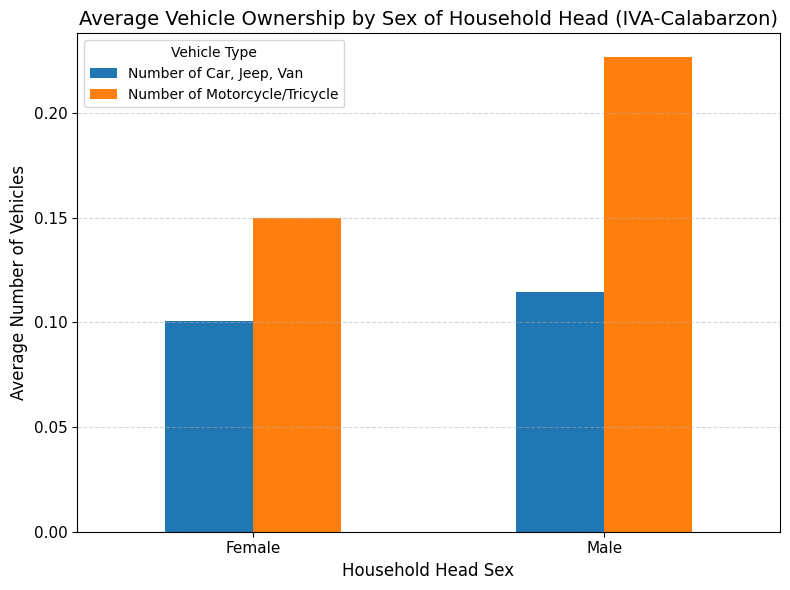

In [8]:
#diagnostic analytics to support 2
veh_means = IVA.groupby("Household Head Sex")[[
    "Number of Car, Jeep, Van",
    "Number of Motorcycle/Tricycle"
]].mean()

# Plot
plt.figure(figsize=(8,6))

veh_means.plot(
    kind='bar',
    figsize=(8,6)
)

plt.title("Average Vehicle Ownership by Sex of Household Head (IVA-Calabarzon)", fontsize=14)
plt.xlabel("Household Head Sex", fontsize=12)
plt.ylabel("Average Number of Vehicles", fontsize=12)

# Professional styling
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Vehicle Type", fontsize=10)

plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The diagnostic analysis of vehicle ownership provides a key explanation for why male-headed households in Region IVA (Calabarzon) show higher average transportation expenditures. The bar chart indicates that male household heads generally own more vehicles—particularly cars, jeeps, vans, and motorcycles—compared to female-headed households. Higher vehicle ownership naturally leads to increased spending on fuel, maintenance, parking, and other transportation-related costs.</p>

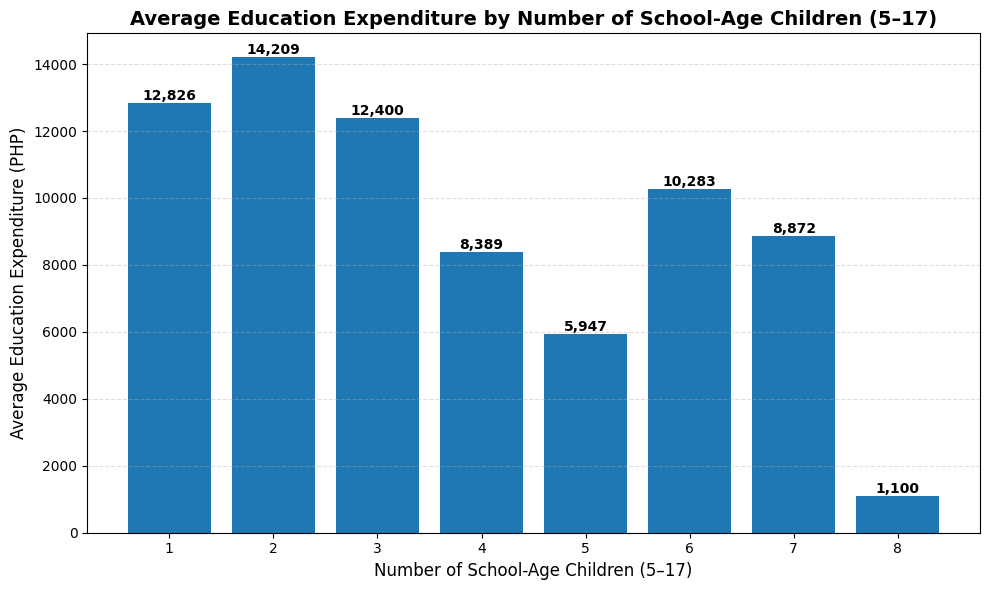

In [9]:
# descriptive analytics 3
filtered_IVA = IVA[IVA['Members with age 5 - 17 years old'] > 0]


edu_group = filtered_IVA.groupby(
    'Members with age 5 - 17 years old'
)['Education Expenditure'].mean()


plt.figure(figsize=(10,6))
bars = plt.bar(edu_group.index.astype(str), edu_group.values)


plt.title("Average Education Expenditure by Number of School-Age Children (5–17)", fontsize=14, weight='bold')
plt.xlabel("Number of School-Age Children (5–17)", fontsize=12)
plt.ylabel("Average Education Expenditure (PHP)", fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}",          # formatted with comma separators
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The visualization reveals an unexpected pattern: households with fewer school-age children (ages 5–17) tend to have the highest average education expenditure, while those with more children spend less per household on average. This suggests that education spending does not increase proportionally with family size.</p>

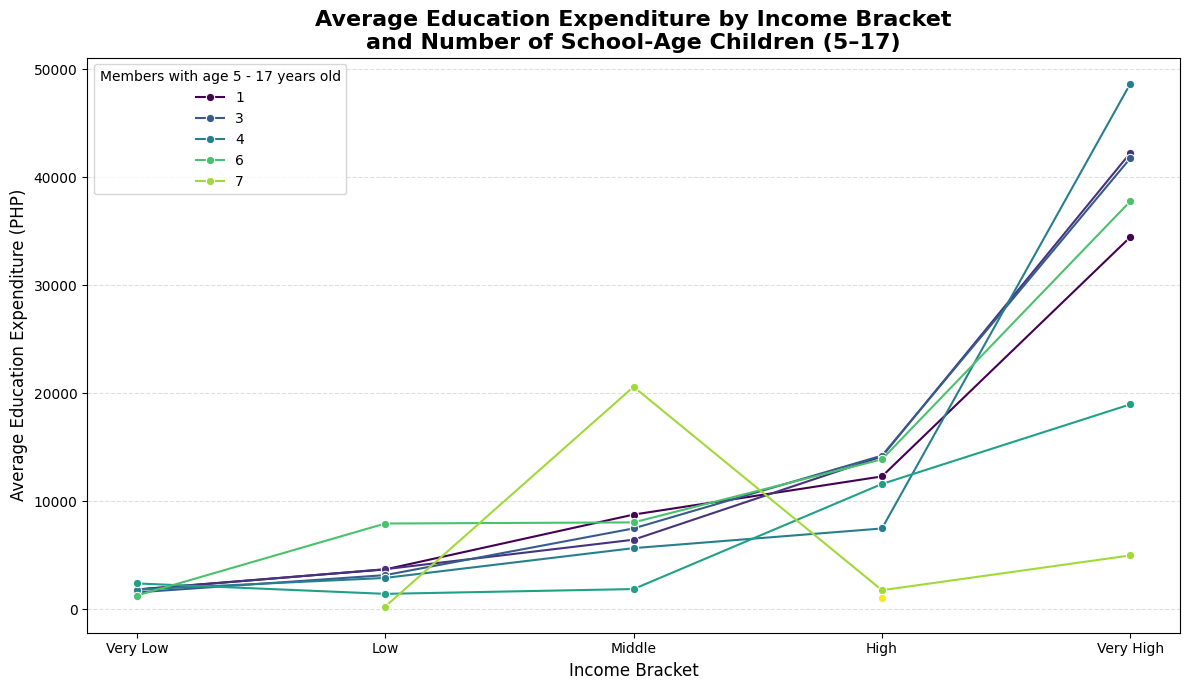

In [10]:
# diagnostic analytics to support 3
filtered_IVA["Income Bracket"] = pd.qcut(
    filtered_IVA["Total Household Income"],
    q=5,
    labels=["Very Low", "Low", "Middle", "High", "Very High"]
)

# Compute mean expenditure per bracket and # of children
income_exp_group = filtered_IVA.groupby(["Income Bracket", "Members with age 5 - 17 years old"])["Education Expenditure"].mean().reset_index()

plt.figure(figsize=(12,7))

sns.lineplot(
    data=income_exp_group,
    x="Income Bracket",
    y="Education Expenditure",
    hue="Members with age 5 - 17 years old",
    marker="o",
    palette="viridis"
)

plt.title("Average Education Expenditure by Income Bracket\nand Number of School-Age Children (5–17)", fontsize=16, weight="bold")
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Average Education Expenditure (PHP)", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The diagnostic analysis shows that income level plays a major role in shaping education spending patterns. Across all income brackets, households with only one school-age child consistently spend more on education than households with multiple children. This pattern becomes even more pronounced in the higher income brackets (“High” and “Very High”), where families with a single child allocate significantly larger amounts to education compared to families with two or more school-age children.</p>

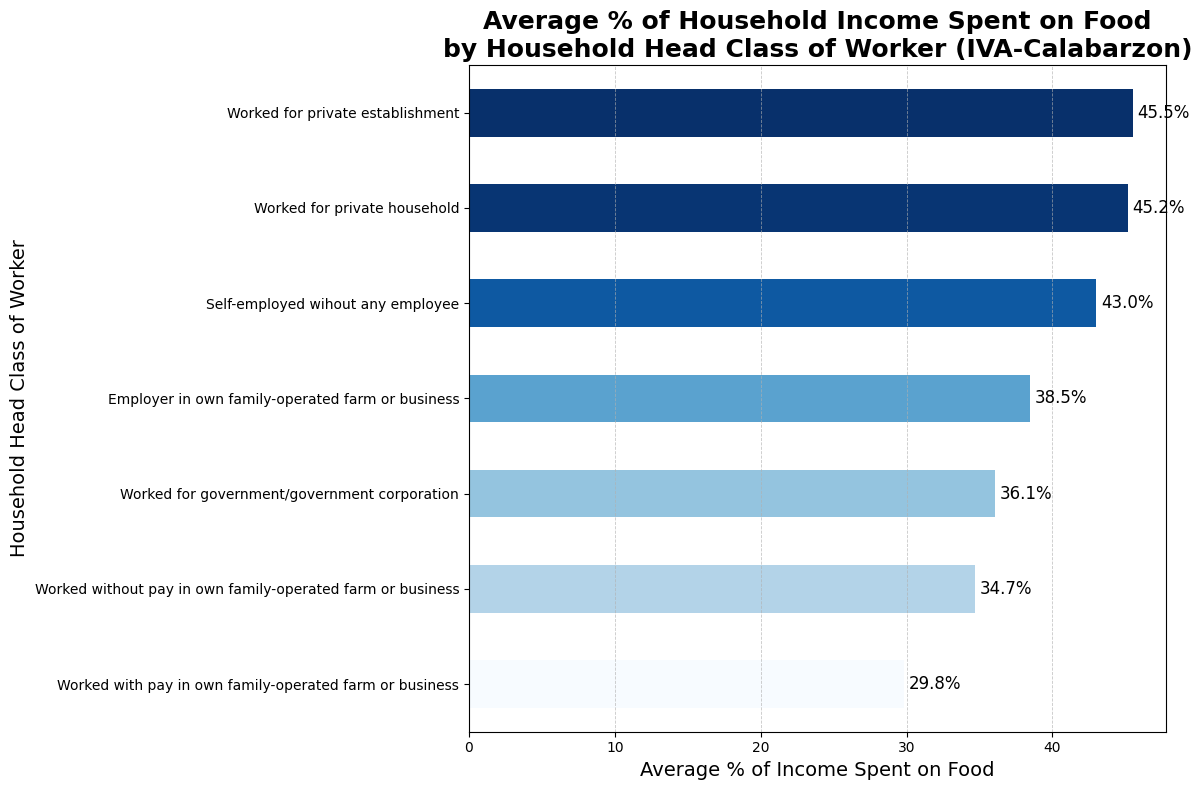

In [11]:
#4 descriptive analytics 4

import matplotlib.cm as cm

IVA_clean = IVA[
    IVA['Household Head Class of Worker']
    .str.lower()
    .ne('unknown')              # removes "Unknown" or "unknown"
    &
    IVA['Household Head Class of Worker']
    .str.lower()
    .ne('uknown')               # removes the misspelled "uknown"
]

# Recompute % of income spent on food
IVA_clean['Pct_Income_on_Food'] = (
    IVA_clean['Total Food Expenditure'] / IVA_clean['Total Household Income'] * 100
)

# Group and sort
income_food_pct = (
    IVA_clean.groupby('Household Head Class of Worker')['Pct_Income_on_Food']
             .mean()
             .sort_values(ascending=True)
)

plt.figure(figsize=(12, 8))

# Smooth color gradient (Blues)
norm = plt.Normalize(income_food_pct.min(), income_food_pct.max())
colors = cm.Blues(norm(income_food_pct.values))

ax = income_food_pct.plot(kind='barh', color=colors)

# Title
plt.title(
    'Average % of Household Income Spent on Food\nby Household Head Class of Worker (IVA-Calabarzon)',
    fontsize=18, weight='bold'
)

# Labels
plt.xlabel('Average % of Income Spent on Food', fontsize=14)
plt.ylabel('Household Head Class of Worker', fontsize=14)

# Grid lines
plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.7)

# Add value labels
for i, v in enumerate(income_food_pct):
    ax.text(v + 0.3, i, f'{v:.1f}%', fontsize=12, va='center')

plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The chart shows substantial variation in how much of their income households spend on food depending on the class of worker of the household head in Region IVA (Calabarzon). Workers in more stable, higher-paying employment categories—such as government employees or private-sector wage earners—tend to spend a large percentage of their income on food. Because their total earnings are higher, food expenses make up a smaller share of their overall budget.</p>

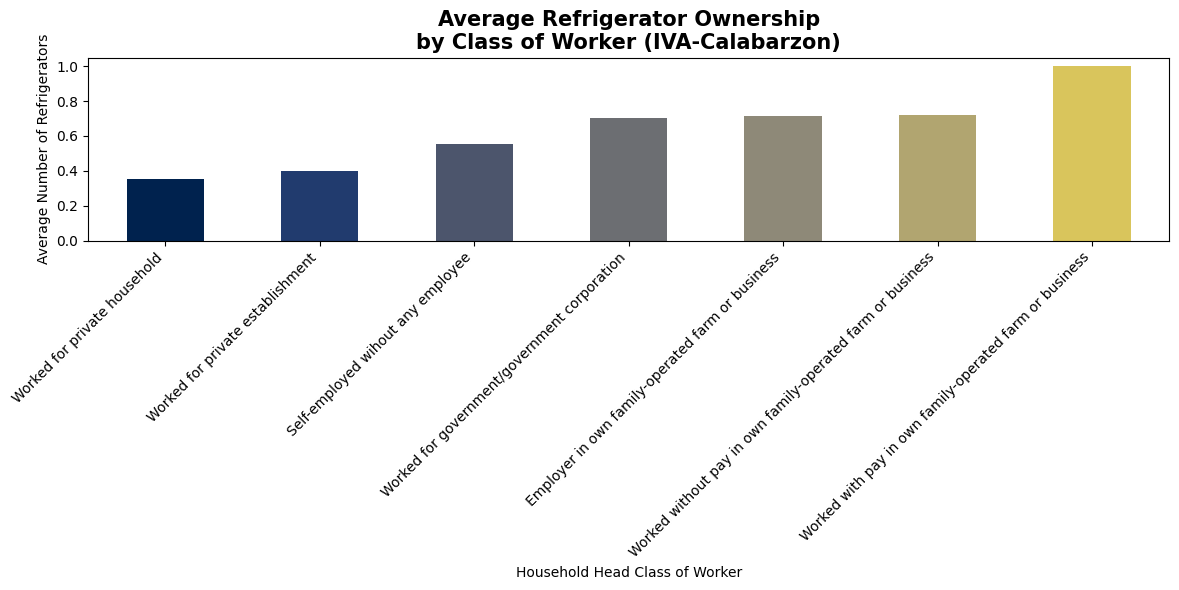

In [12]:
assets = IVA_clean.groupby('Household Head Class of Worker')['Number of Refrigerator/Freezer'].mean().sort_values()

plt.figure(figsize=(12,6))
assets.plot(kind='bar')

plt.title('Average Refrigerator Ownership\nby Class of Worker (IVA-Calabarzon)', fontsize=15, fontweight='bold')
plt.ylabel('Average Number of Refrigerators')
plt.xticks(rotation=45, ha='right')

bars = plt.gca().patches
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.cividis(i / len(bars)))

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>The analysis of refrigerator ownership provides a meaningful explanation for the differences in food spending across worker classes. Worker groups that spend a higher percentage of their income on food also tend to have fewer refrigerators or freezers on average. Limited ownership of cold-storage appliances restricts their ability to buy food in bulk, store perishable items, or take advantage of discounts and promotional purchases. As a result, these households may rely more on frequent, smaller purchases—often at higher prices—which increases the share of their income spent on food.</p>

<h1>Machine Learning for Predictive Analytics</h1>

[181197.67605634 151380.         223678.75       ... 216648.85714286
  84346.99038462 505411.5       ]
R² Score:  80.0%
R² Score: 79.9%


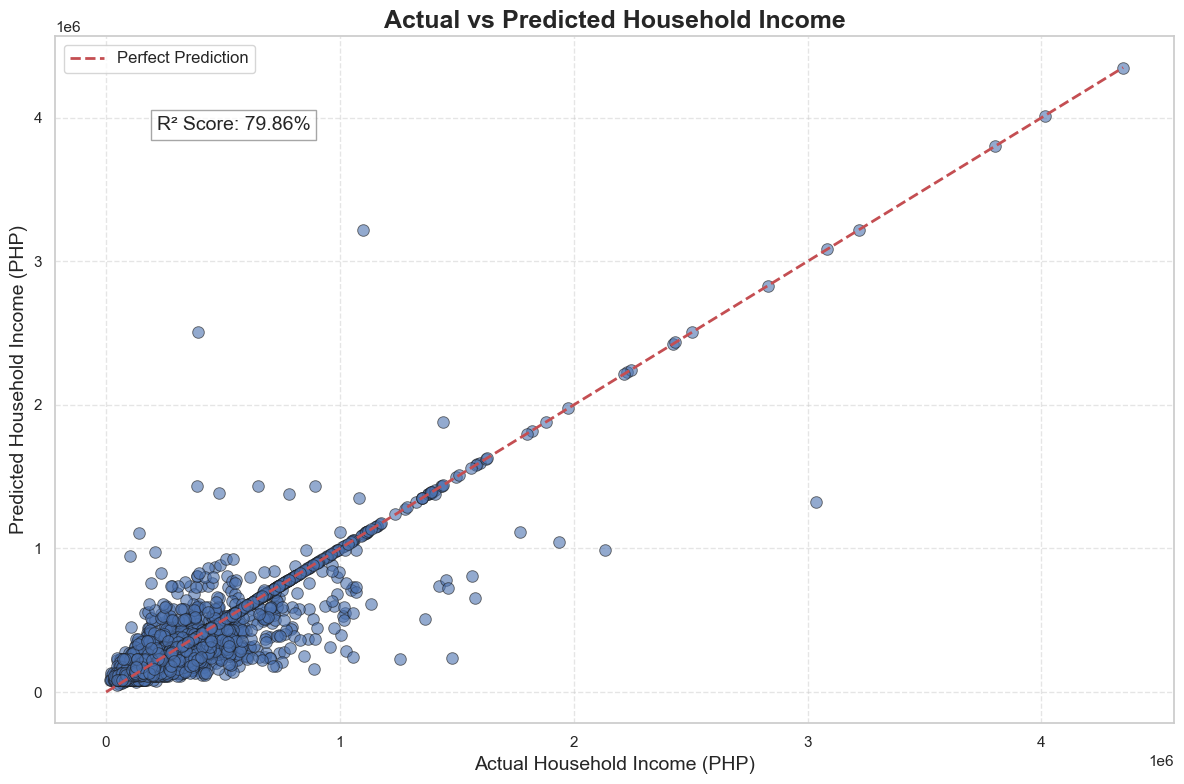

In [78]:


feature = ['Number of Television',
            'Number of CD/VCD/DVD',
            'Number of Component/Stereo set',
            'Number of Refrigerator/Freezer',
            'Number of Washing Machine',
            'Number of Airconditioner',
            'Number of Car, Jeep, Van',
            'Number of Landline/wireless telephones',
            'Number of Cellular phone',
            'Number of Personal Computer',
            'Number of Stove with Oven/Gas Range',
            'Number of Motorized Banca',
            'Number of Motorcycle/Tricycle',]

y = IVA['Total Household Income']
X = IVA[feature]



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X)

# Show first 5 predictions
print(predictions[:-5])

r2 = r2_score(y, predictions)
print(f"R² Score: {r2: .1%}")


r2_income = r2_score(IVA['Total Household Income'], IVA['Predicted_Income'])
print(f"R² Score: {r2_income:.1%}")

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

# Scatter plot with semi-transparent points
sns.scatterplot(
    x=IVA['Total Household Income'],
    y=IVA['Predicted_Income'],
    alpha=0.6,
    s=70,  # size of points
    edgecolor='k',  # black edge for clarity
    palette='coolwarm'
)

# Perfect prediction line
max_val = max(IVA['Total Household Income'].max(), IVA['Predicted_Income'].max())
plt.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')

# Titles and labels
plt.title("Actual vs Predicted Household Income", fontsize=18, weight='bold')
plt.xlabel("Actual Household Income (PHP)", fontsize=14)
plt.ylabel("Predicted Household Income (PHP)", fontsize=14)

# Gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate R² on the plot
plt.text(
    0.05*max_val, 0.9*max_val,
    f'R² Score: {r2_income:.2%}',
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

<h2>Insight</h2>
<hp>The analysis of refrigerator ownership provides a meaningful explanation for the differences in food spending across worker classes. Worker groups that spend a higher percentage of their income on food also tend to have fewer refrigerators or freezers on average. Limited ownership of cold-storage appliances restricts their ability to buy food in bulk, store perishable items, or take advantage of discounts and promotional purchases. As a result, these households may rely more on frequent, smaller purchases—often at higher prices—which increases the share of their income spent on food.</p>

R² Score:  88.8%


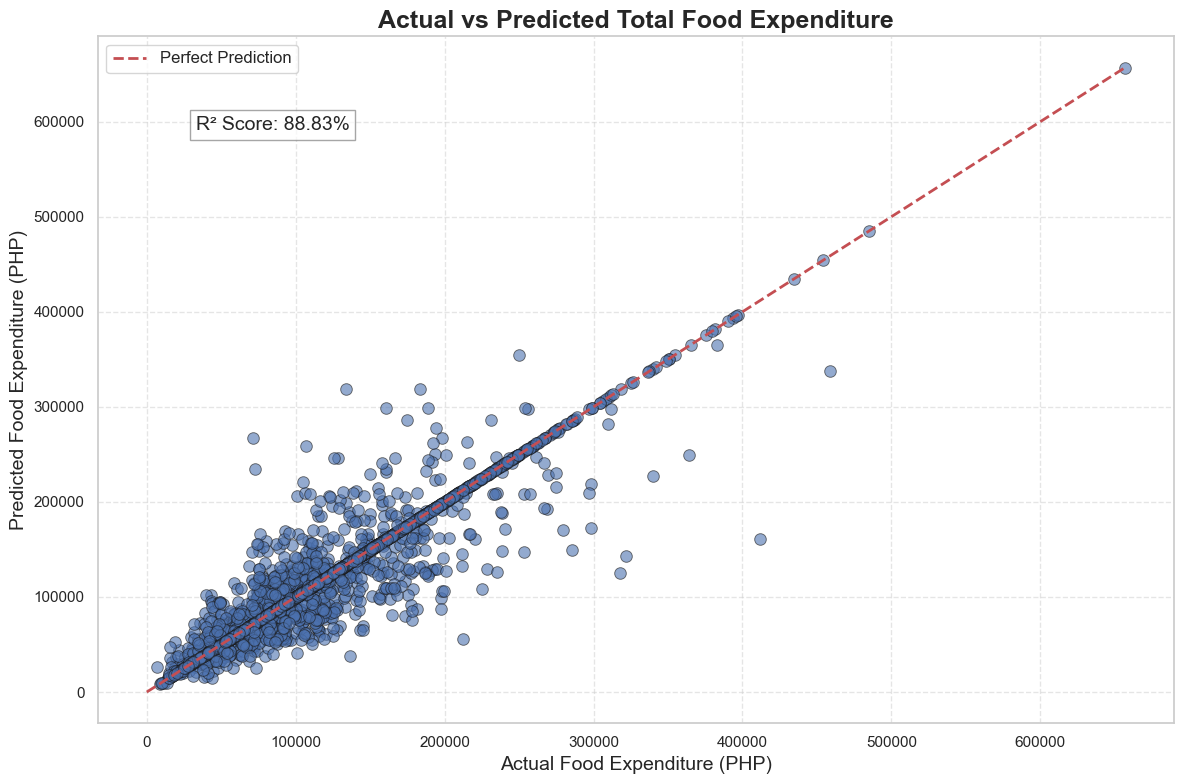

In [76]:
feature = [
    'Number of Television',
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Landline/wireless telephones',
    'Number of Cellular phone',
    'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range',
    'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle',
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed',
    'Number of bedrooms',
    'Total Household Income',
    'Total Income from Entrepreneurial Acitivites',
]

# TARGET
y = IVA['Total Food Expenditure']
X = IVA[feature]

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# MODEL
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# PREDICT ALL
predictions = model.predict(X)

# ADD TO DATAFRAME
IVA['Predicted_Food'] = predictions

# R² Score
r2 = r2_score(y, predictions)
print(f"R² Score: {r2: .1%}")

sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

# Scatter plot with semi-transparent points
sns.scatterplot(
    x=IVA['Total Food Expenditure'],
    y=IVA['Predicted_Food'],
    alpha=0.6,
    s=70,  # size of points
    edgecolor='k',  # add black edge to points
    palette='viridis'
)

# Perfect prediction line
max_val = max(IVA['Total Food Expenditure'].max(), IVA['Predicted_Food'].max())
plt.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')

# Titles and labels
plt.title("Actual vs Predicted Total Food Expenditure", fontsize=18, weight='bold')
plt.xlabel("Actual Food Expenditure (PHP)", fontsize=14)
plt.ylabel("Predicted Food Expenditure (PHP)", fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate R² on the plot
plt.text(
    0.05*max_val, 0.9*max_val,
    f'R² Score: {r2:.2%}',
    fontsize=14,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Add legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


<h2>Insight</h2>
<hp>A decision tree model was used to predict total household food expenditure based on household assets, family composition, employment, and income. The model shows a reasonable ability to estimate food spending, with predicted values generally aligning with actual expenditures. The scatterplot indicates that households with more assets, higher income, and more family members tend to spend more on food.</p>